In [ ]:
!pip install git+https://github.com/ultralytics/ultralytics.git@main

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-_t0uaabc
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-_t0uaabc
  Resolved https://github.com/ultralytics/ultralytics.git to commit 667f306841ee01c926d4efeea9999b8e73409b38
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.226-py3-none-any.whl size=1081441 sha256=050931e970de7b0897268cb19a8d754e86f3d65bd3688c44438613c080c6c0af
  Stored in directory: /tmp/pip-ephem-wheel-cache-7fl3aedn/wheels/bb/0b/bb/3516bf4b0d4c640cfbedf6829f1fa9e8d7dfbcd688eeed795c
Successfully built ultralytics


In [ ]:
import sys
import os

# Define the path to your 'final' folder in Google Drive
project_path = '/content/drive/MyDrive/final'

# Add the project path to the system path so we can import the script
sys.path.append(project_path)

# Check if the training script exists before importing
training_script_path = os.path.join(project_path, 'custom_train.py')
if not os.path.exists(training_script_path):
    print(f'ERROR: `custom_train.py` not found in {project_path}.')
    print('Please ensure the `final` folder is in your Google Drive root and contains the script.')
else:
    try:
        # Change the current working directory to the project folder
        # This helps the script find the ultralytics library and model file
        os.chdir(project_path)
        print(f'Changed working directory to: {os.getcwd()}')

        from custom_train import train_custom_yolo
        print('Successfully imported training function from custom_train.py.')

        # --- Run the training ---
        train_custom_yolo()

    except Exception as e:
        print(f'An error occurred: {e}')
        print('Please ensure all required files are in the `final` folder and the dataset path is correct.')


Changed working directory to: /content/drive/MyDrive/final
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
An error occurred: No module named 'efficientnet_pytorch'
Please ensure all required files are in the `final` folder and the dataset path is correct.


# Default

In [ ]:
from ultralytics.models import YOLO

model = YOLO("yolo11n.yaml")
model = YOLO("yolo11n.pt")
model = YOLO("yolo11n.yaml").load("yolo11n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Transferred 499/499 items from pretrained weights


In [ ]:
results = model.train(data="/content/drive/MyDrive/usw_defect_data/data.yaml", epochs=50, imgsz=640)


Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/usw_defect_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

In [ ]:
import shutil
import os
from google.colab import files

# The user will be prompted to enter the path to the folder they want to zip.
# Example path: /content/drive/My Drive/MyProject/Photos
FOLDER_TO_ZIP = input("Please enter the full path to the folder you want to zip: ")

# The user will also be prompted for the desired name of the output zip file.
OUTPUT_ZIP_NAME = input("Please enter the desired name for your output zip file (without .zip): ")
# --------------------------------------------------------------------------


# STEP 4: Check if the source folder exists
if os.path.exists(FOLDER_TO_ZIP):
    print(f"Folder '{os.path.basename(FOLDER_TO_ZIP)}' found. Starting the zipping process...")

    # The final zip file will be created in the Colab environment's root directory.
    output_path = f'./{OUTPUT_ZIP_NAME}'

    # STEP 5: Zip the folder
    # We use shutil.make_archive to create a zip file from the specified folder.
    try:
        shutil.make_archive(
            base_name=output_path,      # Name of the file to create
            format='zip',               # The archive format
            root_dir=FOLDER_TO_ZIP      # The directory to archive
        )

        final_zip_file = f"{output_path}.zip"
        print(f"Successfully created zip file: {final_zip_file}")

        # STEP 6: Download the created zip file
        print("Triggering download...")
        files.download(final_zip_file)

    except Exception as e:
        print(f"An error occurred during the zipping process: {e}")

else:
    print(f"ERROR: The folder '{FOLDER_TO_ZIP}' was not found. Please check the path and try again.")


Please enter the full path to the folder you want to zip: /content/runs
Please enter the desired name for your output zip file (without .zip): yoloV11n_50epoch_1
Folder 'runs' found. Starting the zipping process...
Successfully created zip file: ./yoloV11n_50epoch_1.zip
Triggering download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Loading model and dataset configuration...
Validation images path: /content/drive/MyDrive/usw_defect_data/images/val
Class names: ['rubber char', 'wire char', 'wire broken', 'side shedding', 'wire stains']

Selected 20 random images for display.


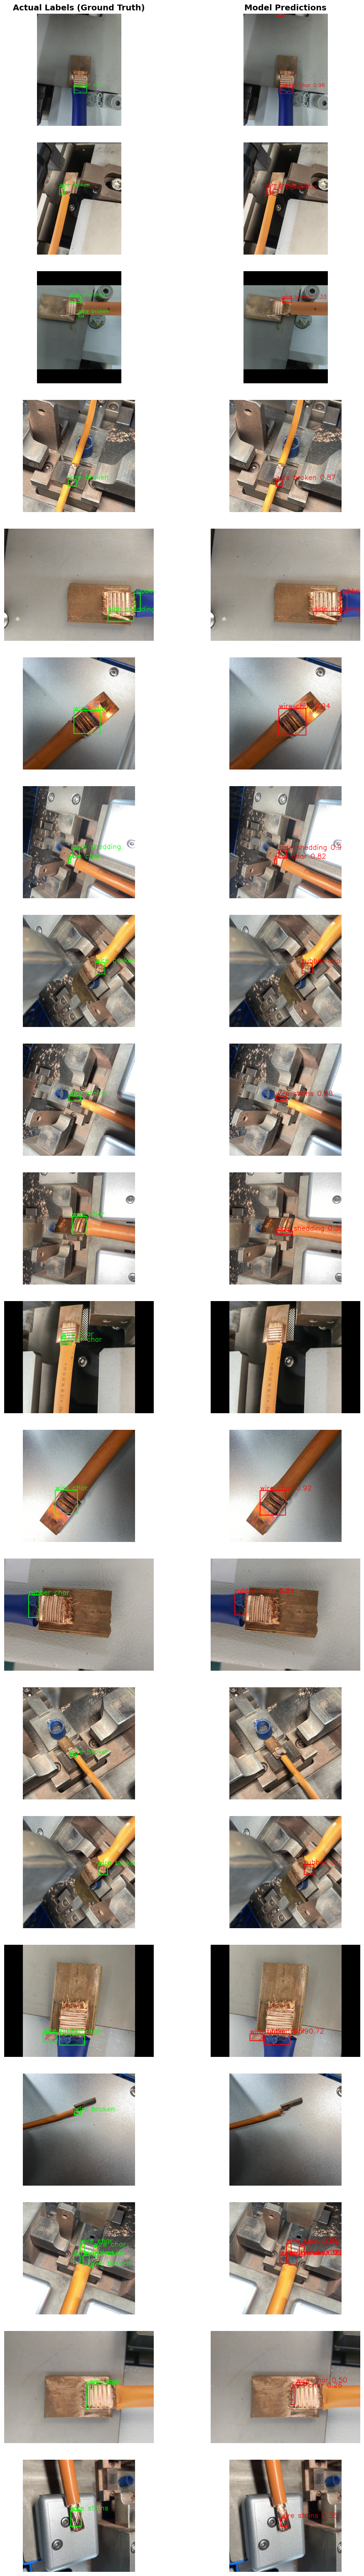

In [ ]:
import os
import random
import yaml
import cv2
import glob
from ultralytics.models import YOLO
import matplotlib.pyplot as plt

# --- 1. Configuration: Set your file paths here ---
MODEL_PATH = '/content/best.pt'
DATA_YAML_PATH = '/content/drive/MyDrive/usw_defect_data/data.yaml'

# --- 2. Load Model and Dataset Configuration ---
print("Loading model and dataset configuration...")
# Load the trained YOLO model
model = YOLO(MODEL_PATH)

# Load the data.yaml file to get class names and validation path
with open(DATA_YAML_PATH, 'r') as file:
    data_config = yaml.safe_load(file)

class_names = data_config['names']
# Construct the full path to the validation images directory
yaml_dir = os.path.dirname(DATA_YAML_PATH)
val_images_path = os.path.join(yaml_dir, data_config['val'])
val_labels_path = val_images_path.replace('images', 'labels')

print(f"Validation images path: {val_images_path}")
print(f"Class names: {class_names}")

# --- 3. Select Random Images ---
# Get a list of all image files in the validation directory
image_files = glob.glob(os.path.join(val_images_path, '*.jpg')) + \
              glob.glob(os.path.join(val_images_path, '*.png'))

# Randomly select 4 images (or fewer if the dataset is small)
num_images_to_show = min(20, len(image_files))
random_image_paths = random.sample(image_files, num_images_to_show)
print(f"\nSelected {len(random_image_paths)} random images for display.")

# --- 4. Generate and Display Predictions vs. Actuals ---
# Create a plot to display the images
fig, axes = plt.subplots(num_images_to_show, 2, figsize=(12, 4 * num_images_to_show))

# Set main titles for the columns
if num_images_to_show > 0:
    axes[0, 0].set_title('Actual Labels (Ground Truth)', fontsize=14, fontweight='bold')
    axes[0, 1].set_title('Model Predictions', fontsize=14, fontweight='bold')

for i, image_path in enumerate(random_image_paths):
    # Load the original image
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    h, w, _ = img_rgb.shape

    # --- Appearance Settings ---
    BOX_THICKNESS = 20  # Increased thickness for the box
    FONT_SCALE = 6
    FONT_THICKNESS = 12 # Increased thickness for the font

    # --- Ground Truth Image (Actual Labels) ---
    img_ground_truth = img_rgb.copy()
    label_path = os.path.join(val_labels_path, os.path.basename(image_path).replace('.jpg', '.txt').replace('.png', '.txt'))

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                class_id, x_center, y_center, width, height = map(float, line.split())
                x1 = int((x_center - width / 2) * w)
                y1 = int((y_center - height / 2) * h)
                x2 = int((x_center + width / 2) * w)
                y2 = int((y_center + height / 2) * h)
                class_name = class_names[int(class_id)]
                # Draw green box for ground truth
                cv2.rectangle(img_ground_truth, (x1, y1), (x2, y2), (0, 255, 0), BOX_THICKNESS)
                cv2.putText(img_ground_truth, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, FONT_SCALE, (0, 255, 0), FONT_THICKNESS)

    # --- Prediction Image ---
    img_prediction = img_rgb.copy()
    results = model.predict(image_path, verbose=False)

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = int(box.cls[0])
            class_name = class_names[cls]
            label = f'{class_name} {conf:.2f}'
            # Draw red box for predictions
            cv2.rectangle(img_prediction, (x1, y1), (x2, y2), (255, 0, 0), BOX_THICKNESS)
            cv2.putText(img_prediction, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, FONT_SCALE, (255, 0, 0), FONT_THICKNESS)

    # --- Display the images ---
    axes[i, 0].imshow(img_ground_truth)
    axes[i, 0].axis('off')
    axes[i, 1].imshow(img_prediction)
    axes[i, 1].axis('off')

# Adjust layout to be more concise
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.show()
